In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.transform import resize

In [2]:
music_dir = 'music/'
cultural_music_types = ['Deuda', 'Newari', 'Ratauli', 'Tharu', 'tamang_selo']
sample_rate = 22050
duration = 30  # seconds
samples_per_track = sample_rate * duration

In [3]:
import librosa
import numpy as np
import os

def extract_mel_spectrogram(y, sr, n_mels=128):
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db

def augment_audio(y, sr):
    augmented = []

    # Time-stretch
    try:
        y_stretch = librosa.effects.time_stretch(y, rate=1.1)
        augmented.append(y_stretch)
    except:
        pass

    # Pitch-shift
    try:
        y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
        augmented.append(y_pitch)
    except:
        pass

    # Add white noise
    try:
        noise = np.random.normal(0, 0.005, y.shape)
        y_noise = y + noise
        augmented.append(y_noise)
    except:
        pass

    return augmented

data = []
labels = []
filenames = []

for cultural_music_type in cultural_music_types:
    cultural_music_type_path = os.path.join(music_dir, cultural_music_type)
    for file in os.listdir(cultural_music_type_path):
        if file.endswith('.wav') or file.endswith('.mp3'):
            file_path = os.path.join(cultural_music_type_path, file)
            y, sr = librosa.load(file_path, sr=22050, duration=30)

            # Original
            mel_spec = extract_mel_spectrogram(y, sr)
            if mel_spec.shape[1] >= 128:
                mel_spec = mel_spec[:, :128]
                data.append(mel_spec)
                labels.append(cultural_music_type)
                filenames.append(f"{file} (original)")

            # Augmented
            for i, y_aug in enumerate(augment_audio(y, sr)):
                mel_aug = extract_mel_spectrogram(y_aug, sr)
                if mel_aug.shape[1] >= 128:
                    mel_aug = mel_aug[:, :128]
                    data.append(mel_aug)
                    labels.append(cultural_music_type)
                    filenames.append(f"{file} (aug{i+1})")


In [4]:
for i in range(10):
    print(f"{filenames[i]} ➡️ {labels[i]}")

53-New-Deuda-Song-2076⧸2020-｜-Lalkali-Ra-Lalya---Lal-Bahadur-Dhami-(Achhami-Baddo)-&-Paschama-Bam.wav (original) ➡️ Deuda
53-New-Deuda-Song-2076⧸2020-｜-Lalkali-Ra-Lalya---Lal-Bahadur-Dhami-(Achhami-Baddo)-&-Paschama-Bam.wav (aug1) ➡️ Deuda
53-New-Deuda-Song-2076⧸2020-｜-Lalkali-Ra-Lalya---Lal-Bahadur-Dhami-(Achhami-Baddo)-&-Paschama-Bam.wav (aug2) ➡️ Deuda
53-New-Deuda-Song-2076⧸2020-｜-Lalkali-Ra-Lalya---Lal-Bahadur-Dhami-(Achhami-Baddo)-&-Paschama-Bam.wav (aug3) ➡️ Deuda
24-देउडा-ठाडी-भाका-New-Nepali-Deuda-Song-｜-Manchheko-Paraani-By-Prakash-Thapa.wav (original) ➡️ Deuda
24-देउडा-ठाडी-भाका-New-Nepali-Deuda-Song-｜-Manchheko-Paraani-By-Prakash-Thapa.wav (aug1) ➡️ Deuda
24-देउडा-ठाडी-भाका-New-Nepali-Deuda-Song-｜-Manchheko-Paraani-By-Prakash-Thapa.wav (aug2) ➡️ Deuda
24-देउडा-ठाडी-भाका-New-Nepali-Deuda-Song-｜-Manchheko-Paraani-By-Prakash-Thapa.wav (aug3) ➡️ Deuda
14-New-Deuda-Song-｜-Achhami-Baddo-Part-2-Dotiki-Chhoryatti---Lal-Bahadur-Dhami-&-Tika-Pun-Ft.-Ramila.wav (original) ➡️ Deuda
14-

In [5]:
from collections import defaultdict

cultural_music_type_files = defaultdict(list)

for label, fname in zip(labels, filenames):
    cultural_music_type_files[label].append(fname)

for cultural_music_type in cultural_music_types:
    print(f"\n🎵 {cultural_music_type.upper()} songs:")
    for fname in cultural_music_type_files[cultural_music_type][:5]:  # show first 5
        print(f"   - {fname}")



🎵 DEUDA songs:
   - 53-New-Deuda-Song-2076⧸2020-｜-Lalkali-Ra-Lalya---Lal-Bahadur-Dhami-(Achhami-Baddo)-&-Paschama-Bam.wav (original)
   - 53-New-Deuda-Song-2076⧸2020-｜-Lalkali-Ra-Lalya---Lal-Bahadur-Dhami-(Achhami-Baddo)-&-Paschama-Bam.wav (aug1)
   - 53-New-Deuda-Song-2076⧸2020-｜-Lalkali-Ra-Lalya---Lal-Bahadur-Dhami-(Achhami-Baddo)-&-Paschama-Bam.wav (aug2)
   - 53-New-Deuda-Song-2076⧸2020-｜-Lalkali-Ra-Lalya---Lal-Bahadur-Dhami-(Achhami-Baddo)-&-Paschama-Bam.wav (aug3)
   - 24-देउडा-ठाडी-भाका-New-Nepali-Deuda-Song-｜-Manchheko-Paraani-By-Prakash-Thapa.wav (original)

🎵 NEWARI songs:
   - 05-Bhriguram-Shrestha-(Maya-re-ratna).wav (original)
   - 05-Bhriguram-Shrestha-(Maya-re-ratna).wav (aug1)
   - 05-Bhriguram-Shrestha-(Maya-re-ratna).wav (aug2)
   - 05-Bhriguram-Shrestha-(Maya-re-ratna).wav (aug3)
   - 58-Thau-Waila-Kanhe-Waila-Newari-Song.wav (original)

🎵 RATAULI songs:
   - 11-Super-Hit-Nepali-Panchebaja-｜-चितवन-जिल्लाको-सुपरहिट-पन्चे-बाजा.wav (original)
   - 11-Super-Hit-Nepali-P

In [6]:
print("Total samples:", len(data))
print("Total labels :", len(labels))


Total samples: 1328
Total labels : 1328


In [7]:
from collections import Counter

label_counts = Counter(labels)
print("Samples per cultural_music_types:")
for cultural_music_type, count in label_counts.items():
    print(f"{cultural_music_type}: {count}")


Samples per cultural_music_types:
Deuda: 304
Newari: 216
Ratauli: 220
Tharu: 288
tamang_selo: 300


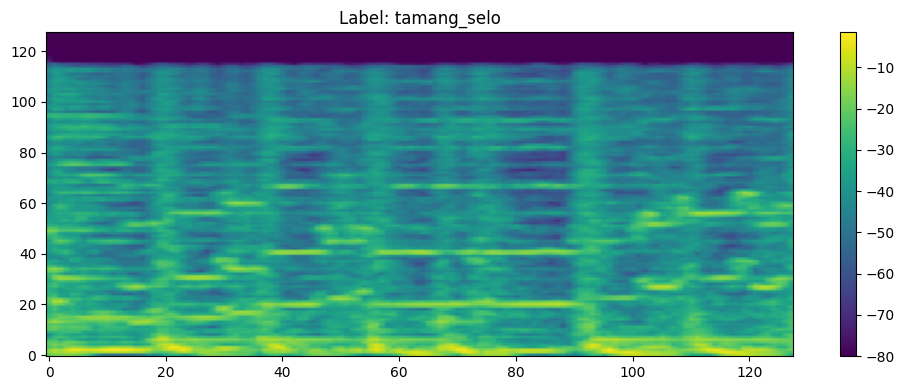

In [8]:
import matplotlib.pyplot as plt
import random

i = random.randint(0, len(data)-1)
plt.figure(figsize=(10, 4))
plt.imshow(data[i], aspect='auto', origin='lower')
plt.title(f"Label: {labels[i]}")
plt.colorbar()
plt.tight_layout()
plt.show()


In [9]:
from collections import defaultdict, Counter
import random

# Group all data by cultural_music_types
cultural_music_type_to_samples = defaultdict(list)

for mel, label in zip(data, labels):
    cultural_music_type_to_samples[label].append(mel)

# Find max count
max_count = max(len(samples) for samples in cultural_music_type_to_samples.values())

# New balanced lists
balanced_data = []
balanced_labels = []

for cultural_music_type, samples in cultural_music_type_to_samples.items():
    current_count = len(samples)
    if current_count < max_count:
        # Randomly duplicate samples
        extra = random.choices(samples, k=max_count - current_count)
        samples += extra
    balanced_data.extend(samples)
    balanced_labels.extend([cultural_music_type] * max_count)

print("✅ Oversampling done.")
print("Balanced sample count per cultural_music_types:")
for cultural_music_type in cultural_music_type_to_samples:
    print(f"{cultural_music_type}: {max_count}")


✅ Oversampling done.
Balanced sample count per cultural_music_types:
Deuda: 304
Newari: 304
Ratauli: 304
Tharu: 304
tamang_selo: 304


In [10]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
import numpy as np


# Normalize spectrograms to 0–1
X = np.array(balanced_data)
X = (X - X.min()) / (X.max() - X.min())
X = X[..., np.newaxis]

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(balanced_labels)
y = tf.keras.utils.to_categorical(y)

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(8, (3, 3), padding='same', input_shape=X[0].shape),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(16, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(32, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Flatten(),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.6),

    Dense(5, activation='softmax')
])



/Users/macbook/Documents/college/artificial neural network/assignment/folk-tune-nepal/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/macbook/Documents/college/artificial neural network/assignment/folk-tune-nepal/venv/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
# Compile the model with very small learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping + model checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_leaky.h5', save_best_only=True)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,592,145 (6.07 MB)

 Trainable params: 530,677 (2.02 MB)

 Non-trainable params: 112 (448.00 B)

 Optimizer params: 1,061,356 (4.05 MB)

In [13]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1000,
    batch_size=16,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2297 - loss: 3.1388

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2301 - loss: 3.1187 - val_accuracy: 0.2007 - val_loss: 2.4418
Epoch 2/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2990 - loss: 1.7822 - val_accuracy: 0.2007 - val_loss: 5.0215
Epoch 3/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3219 - loss: 1.6590 - val_accuracy: 0.2007 - val_loss: 6.8556
Epoch 4/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3977 - loss: 1.5895 - val_accuracy: 0.2007 - val_loss: 8.8837
Epoch 5/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4224 - loss: 1.5142 - val_accuracy: 0.2007 - val_loss: 9.8210
Epoch 6/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4230 - loss: 1.3527 - val_accuracy: 0.2007 - val_loss: 9.5318
Epoch 7/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4654 - loss: 1.3771 - val_accuracy: 0.2007 - val_loss: 7.6329
Epoch 8/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5276 - loss: 1.1913 - val_accuracy: 0.2072 

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5714 - loss: 1.0777 - val_accuracy: 0.3618 - val_loss: 2.0850
Epoch 11/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6026 - loss: 1.0448

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6026 - loss: 1.0448 - val_accuracy: 0.5822 - val_loss: 1.2533
Epoch 12/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6467 - loss: 0.9368 - val_accuracy: 0.5658 - val_loss: 1.3162
Epoch 13/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6680 - loss: 0.9234

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6681 - loss: 0.9233 - val_accuracy: 0.6809 - val_loss: 0.9736
Epoch 14/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6461 - loss: 0.8990 - val_accuracy: 0.6217 - val_loss: 1.2283
Epoch 15/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6304 - loss: 0.8654 - val_accuracy: 0.6480 - val_loss: 1.0036
Epoch 16/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6998 - loss: 0.8251

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7001 - loss: 0.8240 - val_accuracy: 0.6776 - val_loss: 0.9311
Epoch 17/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7392 - loss: 0.6948 - val_accuracy: 0.6875 - val_loss: 0.9921
Epoch 18/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7092 - loss: 0.7607

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7099 - loss: 0.7591 - val_accuracy: 0.7270 - val_loss: 0.8622
Epoch 19/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7605 - loss: 0.7375 - val_accuracy: 0.6875 - val_loss: 1.0101
Epoch 20/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7538 - loss: 0.6743 - val_accuracy: 0.7237 - val_loss: 0.9086
Epoch 21/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7361 - loss: 0.6385 - val_accuracy: 0.7270 - val_loss: 0.8648
Epoch 22/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7620 - loss: 0.6220 - val_accuracy: 0.7434 - val_loss: 0.8740
Epoch 23/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7798 - loss: 0.5794

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7799 - loss: 0.5796 - val_accuracy: 0.7401 - val_loss: 0.7698
Epoch 24/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7847 - loss: 0.5782

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7849 - loss: 0.5782 - val_accuracy: 0.7632 - val_loss: 0.7102
Epoch 25/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7920 - loss: 0.5717 - val_accuracy: 0.7105 - val_loss: 0.9055
Epoch 26/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8247 - loss: 0.4682 - val_accuracy: 0.7336 - val_loss: 0.7444
Epoch 27/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8254 - loss: 0.4649

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8252 - loss: 0.4656 - val_accuracy: 0.7961 - val_loss: 0.5680
Epoch 28/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8450 - loss: 0.4226

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8448 - loss: 0.4234 - val_accuracy: 0.8224 - val_loss: 0.5132
Epoch 29/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8434 - loss: 0.4255 - val_accuracy: 0.7533 - val_loss: 0.7485
Epoch 30/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8148 - loss: 0.4475 - val_accuracy: 0.8125 - val_loss: 0.5794
Epoch 31/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8379 - loss: 0.4307 - val_accuracy: 0.8059 - val_loss: 0.5692
Epoch 32/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8645 - loss: 0.3750 - val_accuracy: 0.7862 - val_loss: 0.6178
Epoch 33/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8594 - loss: 0.3874 - val_accuracy: 0.7961 - val_loss: 0.5799
Epoch 34/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8671 - loss: 0.3497

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8670 - loss: 0.3501 - val_accuracy: 0.8388 - val_loss: 0.4670
Epoch 35/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8722 - loss: 0.3819

76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8722 - loss: 0.3808 - val_accuracy: 0.8388 - val_loss: 0.4427
Epoch 36/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8598 - loss: 0.3349 - val_accuracy: 0.8224 - val_loss: 0.4865
Epoch 37/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8620 - loss: 0.3366 - val_accuracy: 0.7829 - val_loss: 0.6993
Epoch 38/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8712 - loss: 0.3327

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8711 - loss: 0.3332 - val_accuracy: 0.8553 - val_loss: 0.4089
Epoch 39/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8742 - loss: 0.3489 - val_accuracy: 0.8322 - val_loss: 0.5184
Epoch 40/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8856 - loss: 0.3317 - val_accuracy: 0.8487 - val_loss: 0.4342
Epoch 41/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8916 - loss: 0.2956 - val_accuracy: 0.8553 - val_loss: 0.4125
Epoch 42/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8961 - loss: 0.2724

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8959 - loss: 0.2732 - val_accuracy: 0.8651 - val_loss: 0.3787
Epoch 43/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9055 - loss: 0.2698 - val_accuracy: 0.8684 - val_loss: 0.4263
Epoch 44/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9037 - loss: 0.2379 - val_accuracy: 0.8322 - val_loss: 0.5535
Epoch 45/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9165 - loss: 0.2569

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9163 - loss: 0.2574 - val_accuracy: 0.8914 - val_loss: 0.3671
Epoch 46/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9087 - loss: 0.2539 - val_accuracy: 0.8618 - val_loss: 0.3881
Epoch 47/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9101 - loss: 0.2344

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9103 - loss: 0.2342 - val_accuracy: 0.9046 - val_loss: 0.3440
Epoch 48/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9071 - loss: 0.2404 - val_accuracy: 0.8684 - val_loss: 0.4505
Epoch 49/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9156 - loss: 0.2377 - val_accuracy: 0.8618 - val_loss: 0.4679
Epoch 50/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9242 - loss: 0.2275 - val_accuracy: 0.8816 - val_loss: 0.3831
Epoch 51/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9249 - loss: 0.2082

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9249 - loss: 0.2084 - val_accuracy: 0.9145 - val_loss: 0.3228
Epoch 52/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9193 - loss: 0.1969 - val_accuracy: 0.8816 - val_loss: 0.4005
Epoch 53/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9278 - loss: 0.2122

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9280 - loss: 0.2121 - val_accuracy: 0.9178 - val_loss: 0.2946
Epoch 54/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9275 - loss: 0.2011 - val_accuracy: 0.8849 - val_loss: 0.4509
Epoch 55/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9307 - loss: 0.2046 - val_accuracy: 0.9112 - val_loss: 0.3430
Epoch 56/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9270 - loss: 0.2058

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9270 - loss: 0.2059 - val_accuracy: 0.9309 - val_loss: 0.2668
Epoch 57/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9258 - loss: 0.1813 - val_accuracy: 0.8947 - val_loss: 0.3491
Epoch 58/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9304 - loss: 0.2051 - val_accuracy: 0.9178 - val_loss: 0.3555
Epoch 59/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9401 - loss: 0.1677 - val_accuracy: 0.8454 - val_loss: 0.4727
Epoch 60/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9252 - loss: 0.2225 - val_accuracy: 0.8750 - val_loss: 0.4382
Epoch 61/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9370 - loss: 0.1928 - val_accuracy: 0.9211 - val_loss: 0.2935
Epoch 62/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9578 - loss: 0.1262 - val_accuracy: 0.9112 - val_loss: 0.2917
Epoch 63/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9524 - loss: 0.1631 - val_accuracy: 

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9642 - loss: 0.1096 - val_accuracy: 0.9309 - val_loss: 0.2655
Epoch 71/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9570 - loss: 0.1062 - val_accuracy: 0.9309 - val_loss: 0.2675
Epoch 72/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9434 - loss: 0.1380 - val_accuracy: 0.9079 - val_loss: 0.3541
Epoch 73/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9546 - loss: 0.1153 - val_accuracy: 0.9178 - val_loss: 0.2926
Epoch 74/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9449 - loss: 0.1259 - val_accuracy: 0.9211 - val_loss: 0.3104
Epoch 75/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9572 - loss: 0.1371 - val_accuracy: 0.9309 - val_loss: 0.2955
Epoch 76/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9537 - loss: 0.1301 - val_accuracy: 0.9211 - val_loss: 0.3016
Epoch 77/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9499 - loss: 0.1424 - val_accuracy: 

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9453 - loss: 0.1473 - val_accuracy: 0.9309 - val_loss: 0.2509
Epoch 79/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9642 - loss: 0.1190 - val_accuracy: 0.8914 - val_loss: 0.3865
Epoch 80/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9709 - loss: 0.0844 - val_accuracy: 0.9178 - val_loss: 0.2983
Epoch 81/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9576 - loss: 0.1171 - val_accuracy: 0.9079 - val_loss: 0.3335
Epoch 82/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9542 - loss: 0.1210 - val_accuracy: 0.9112 - val_loss: 0.3205
Epoch 83/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9516 - loss: 0.1200

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9516 - loss: 0.1202 - val_accuracy: 0.9243 - val_loss: 0.2490
Epoch 84/1000
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9670 - loss: 0.1026

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9669 - loss: 0.1029 - val_accuracy: 0.9342 - val_loss: 0.2360
Epoch 85/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9593 - loss: 0.1056 - val_accuracy: 0.9178 - val_loss: 0.3300
Epoch 86/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9545 - loss: 0.1161 - val_accuracy: 0.9276 - val_loss: 0.3035
Epoch 87/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9708 - loss: 0.0873 - val_accuracy: 0.9342 - val_loss: 0.3121
Epoch 88/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9596 - loss: 0.1474 - val_accuracy: 0.9342 - val_loss: 0.2727
Epoch 89/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9608 - loss: 0.0898 - val_accuracy: 0.9342 - val_loss: 0.3042
Epoch 90/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9645 - loss: 0.1008 - val_accuracy: 0.9211 - val_loss: 0.3345
Epoch 91/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9644 - loss: 0.1123 - val_accuracy: 

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9669 - loss: 0.0881 - val_accuracy: 0.9539 - val_loss: 0.2215
Epoch 95/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9801 - loss: 0.0598 - val_accuracy: 0.9441 - val_loss: 0.2591
Epoch 96/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9681 - loss: 0.0829 - val_accuracy: 0.9309 - val_loss: 0.3001
Epoch 97/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9642 - loss: 0.1027 - val_accuracy: 0.9408 - val_loss: 0.2505
Epoch 98/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9663 - loss: 0.0981

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9662 - loss: 0.0984 - val_accuracy: 0.9638 - val_loss: 0.1875
Epoch 99/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9676 - loss: 0.0821 - val_accuracy: 0.9342 - val_loss: 0.2678
Epoch 100/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9660 - loss: 0.1058 - val_accuracy: 0.9309 - val_loss: 0.2954
Epoch 101/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9783 - loss: 0.0784 - val_accuracy: 0.9441 - val_loss: 0.2766
Epoch 102/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9766 - loss: 0.0769 - val_accuracy: 0.9408 - val_loss: 0.2902
Epoch 103/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9711 - loss: 0.0719 - val_accuracy: 0.9474 - val_loss: 0.2532
Epoch 104/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9738 - loss: 0.0646 - val_accuracy: 0.9441 - val_loss: 0.2565
Epoch 105/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9843 - loss: 0.0635 - val_accu

In [ ]:
# Find best epoch based on validation loss
best_epoch = np.argmin(history.history['val_loss']) + 1

# Best validation accuracy at that epoch
best_val_acc = history.history['val_accuracy'][best_epoch - 1]

# Training accuracy at that epoch
best_train_acc = history.history['accuracy'][best_epoch - 1]

# Final epoch before early stopping
final_epoch = len(history.history['loss'])

# Final training and validation loss
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Loss at convergence (best val_loss)
best_val_loss = history.history['val_loss'][best_epoch - 1]

# Print summary
print(f"✅ Best model was at epoch {best_epoch}")
print(f"Training Accuracy at best epoch: {best_train_acc:.2%}")
print(f"Validation Accuracy at best epoch: {best_val_acc:.2%}")
print(f"Final Epoch (Stopped): {final_epoch}")
print(f"Loss at Convergence (val_loss): {best_val_loss:.4f}")


✅ Best model was at epoch 98
Training Accuracy at best epoch: 96.22%
Validation Accuracy at best epoch: 96.38%
Final Epoch (Stopped): 118
Loss at Convergence (val_loss): 0.1875


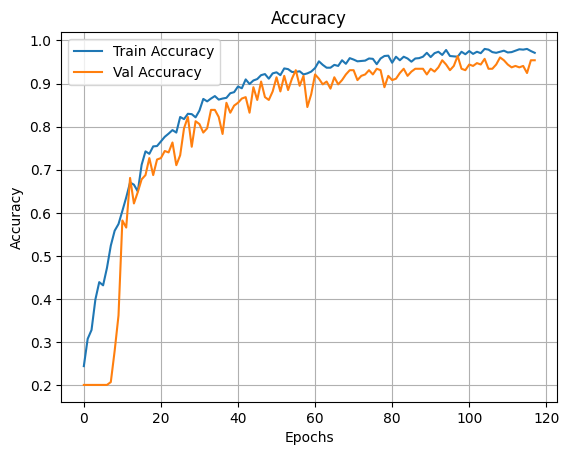

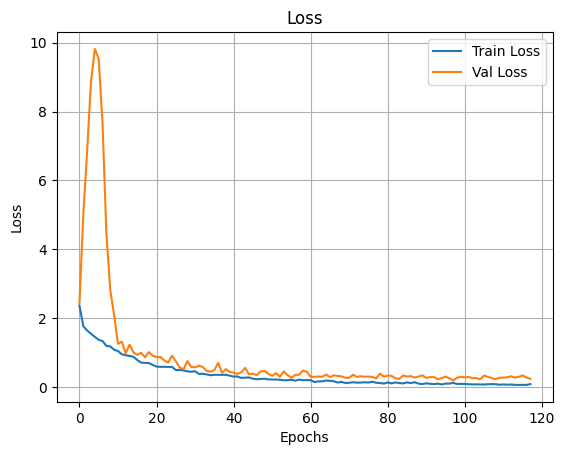

In [21]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


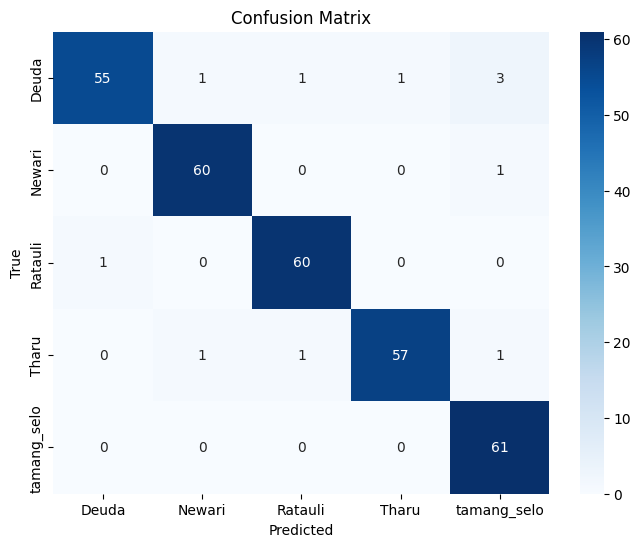

              precision    recall  f1-score   support

       Deuda       0.98      0.90      0.94        61
      Newari       0.97      0.98      0.98        61
     Ratauli       0.97      0.98      0.98        61
       Tharu       0.98      0.95      0.97        60
 tamang_selo       0.92      1.00      0.96        61

    accuracy                           0.96       304
   macro avg       0.96      0.96      0.96       304
weighted avg       0.96      0.96      0.96       304



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=encoder.classes_))


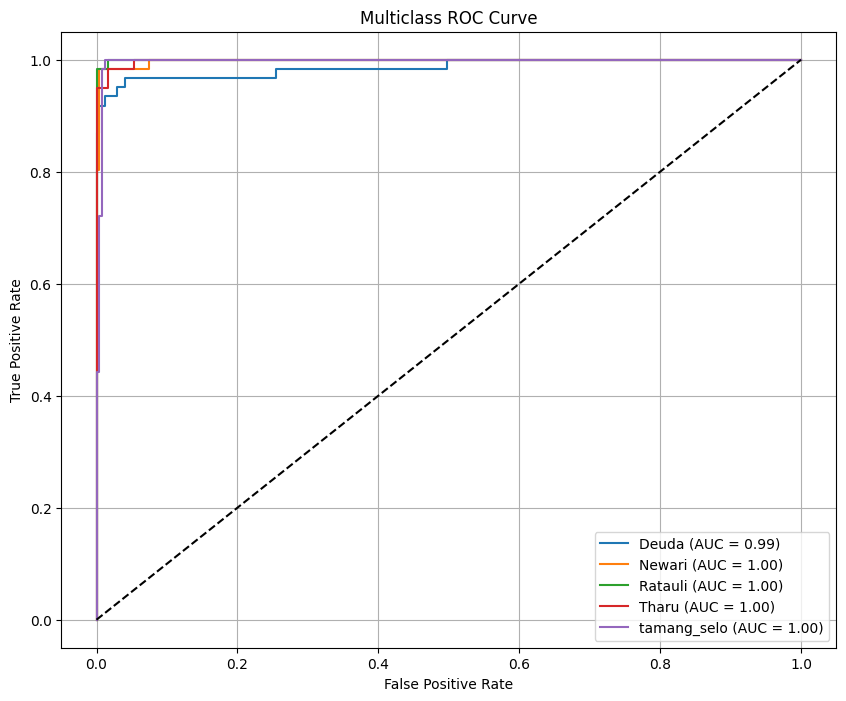

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize true and pred labels
y_val_bin = label_binarize(np.argmax(y_val, axis=1), classes=range(len(encoder.classes_)))
y_pred_bin = y_pred  # from model.predict earlier

plt.figure(figsize=(10, 8))

for i, cultural_music_type in enumerate(encoder.classes_):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cultural_music_type} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


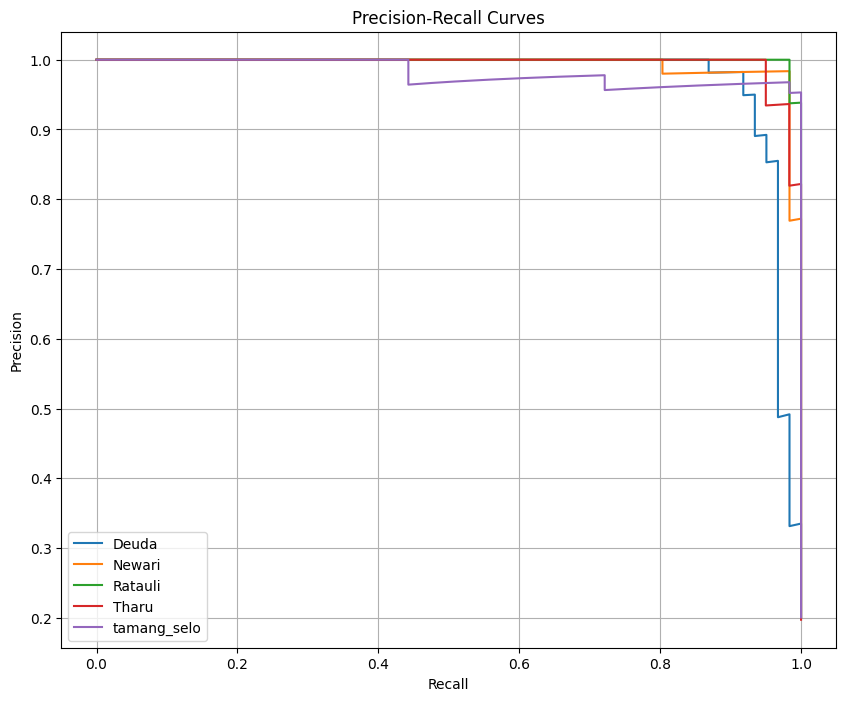

In [30]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for i, cultural_music_type in enumerate(encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_val_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall, precision, label=f'{cultural_music_type}')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [35]:
import pickle

with open("cultural_music_type_label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


In [36]:
from tensorflow.keras.models import load_model
import pickle

# Load model
model = load_model("best_model_leaky.h5")

# Load label encoder
with open("cultural_music_type_label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)


In [37]:
# Prediction function
def predict_cultural_music_type(file_path):
    y, sr = librosa.load(file_path, sr=22050, duration=30)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    if mel_db.shape[1] < 128:
        pad_width = 128 - mel_db.shape[1]
        mel_db = np.pad(mel_db, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mel_db = mel_db[:, :128]

    mel_db = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min())
    mel_db = mel_db[np.newaxis, ..., np.newaxis]

    pred = model.predict(mel_db)
    predicted_index = np.argmax(pred)
    predicted_cultural_music_type = encoder.inverse_transform([predicted_index])[0]
    confidence = pred[0][predicted_index]
    return predicted_cultural_music_type, confidence


In [38]:

sample_folder = 'sample'
for filename in os.listdir(sample_folder):
    if filename.endswith(".wav"):
        filepath = os.path.join(sample_folder, filename)
        cultural_music_type, confidence = predict_cultural_music_type(filepath)
        print(f"🎵 {filename}: {cultural_music_type} ({confidence:.2%} confidence)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
🎵 ratauli-2.wav: Deuda (86.71% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 ratauli-3.wav: Ratauli (99.96% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 ratauli-1.wav: Ratauli (98.79% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 ratauli-4.wav: Ratauli (100.00% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 ratauli-5.wav: Ratauli (100.00% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
🎵 deuda-sample.wav: Deuda (98.94% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
🎵 tamang-selo.wav: Tharu (58.30% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 newari-1.wav: Newari (72.68% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 deuda-1.wav: Deuda (99.97% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 deuda-2.wav: Deuda (44.36% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 tamang-selo-1.wav: tamang_selo (98.78% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🎵 tharu-1.wav: Ratauli (90.35% confidence)
1/1 ━━━

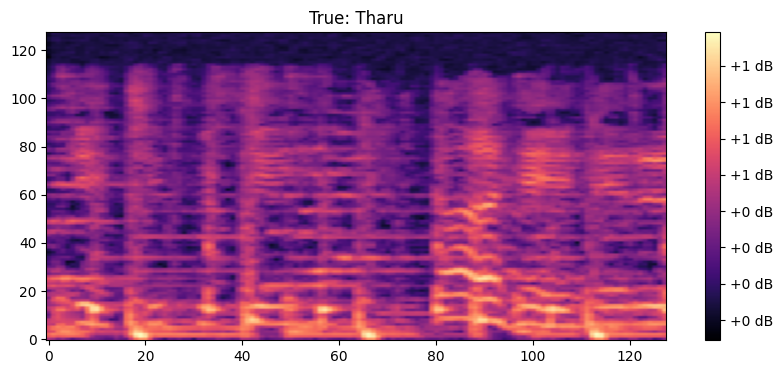

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
🔮 Predicted: ['Tharu'] 99.78%


In [51]:
import matplotlib.pyplot as plt

idx = 0  # index of sample
plt.figure(figsize=(10, 4))
plt.imshow(X_val[idx].squeeze(), aspect='auto', origin='lower', cmap='magma')
plt.title(f"True: {encoder.inverse_transform([np.argmax(y_val[idx])])[0]}")
plt.colorbar(format='%+2.0f dB')
plt.show()

# Predict
pred = model.predict(X_val[idx][np.newaxis, ...])
print("🔮 Predicted:", encoder.inverse_transform([np.argmax(pred)]), f"{np.max(pred)*100:.2f}%")


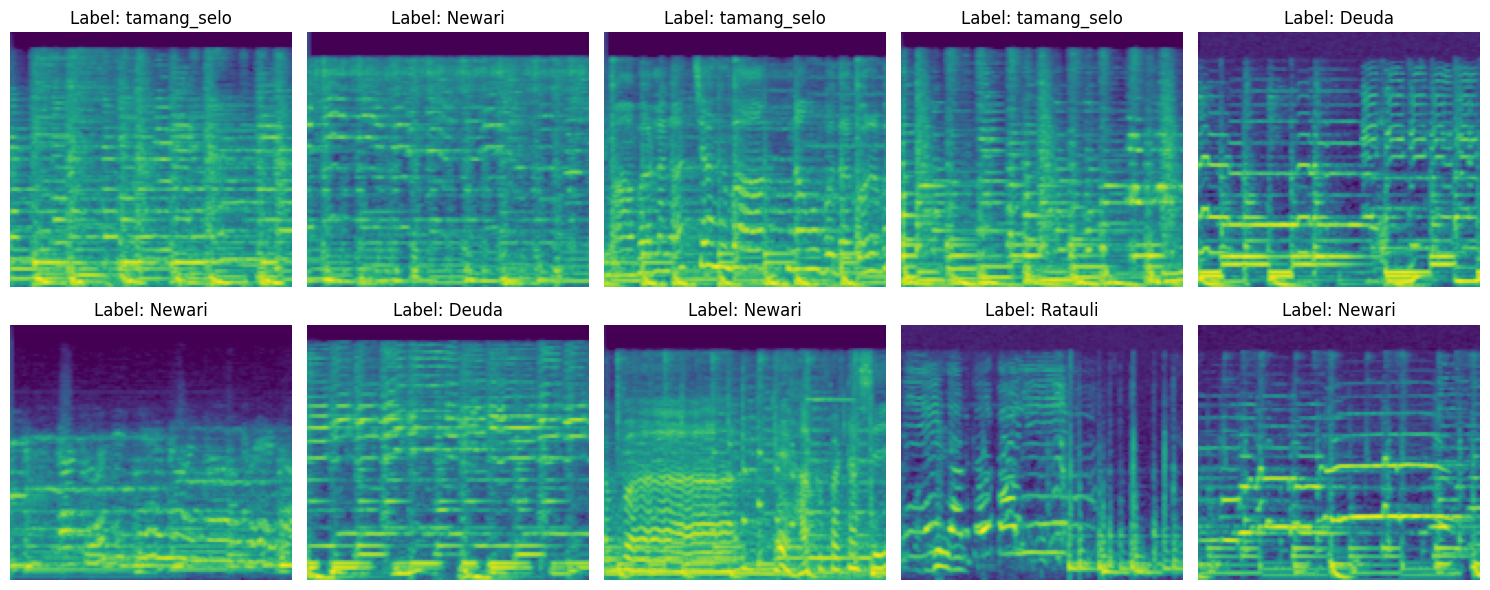

In [74]:
import matplotlib.pyplot as plt
import random

# Set the number of samples to display
num_samples = 10

# Generate 10 random indices
random_indices = random.sample(range(len(data)), num_samples)

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(data[idx], aspect='auto', origin='lower')
    ax.set_title(f"Label: {labels[idx]}")
    ax.axis("off")  # Hide axis for better visualization

plt.tight_layout()
plt.show()
